# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [7]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG

'''


'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n\n'

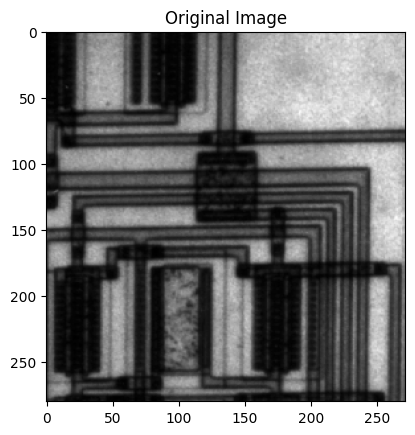

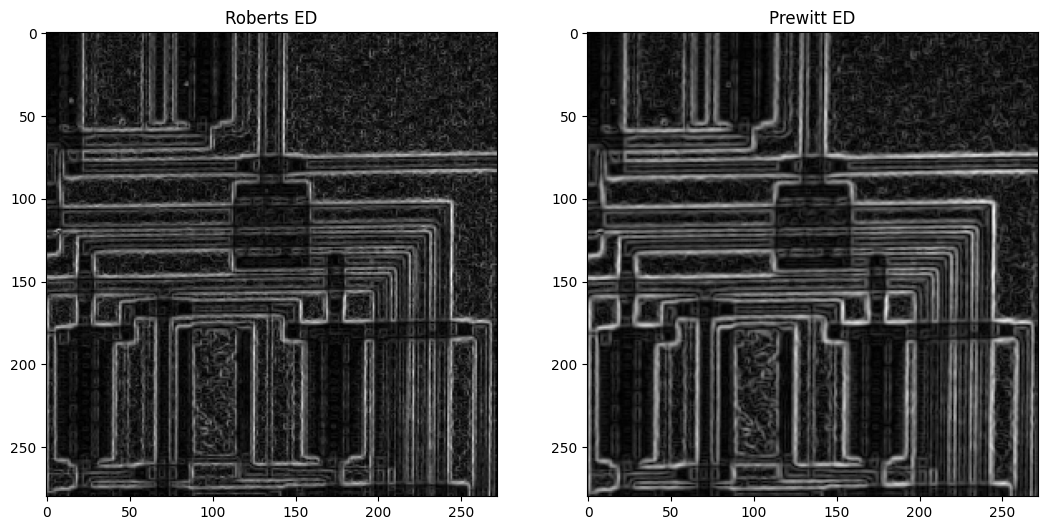

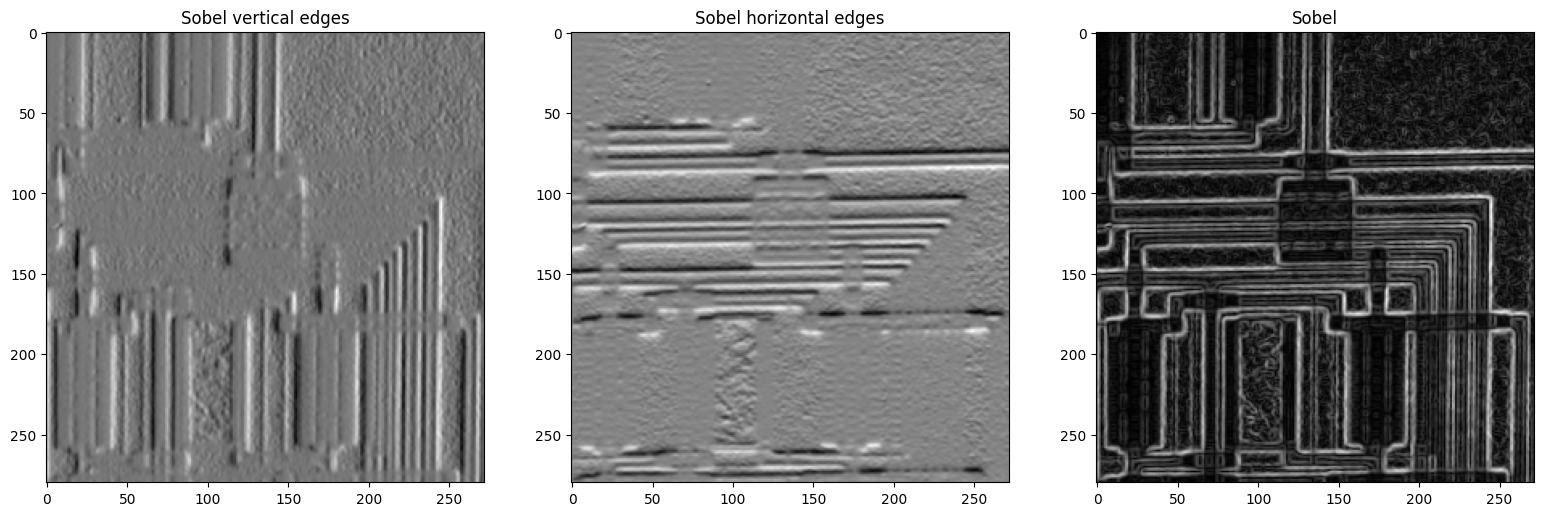

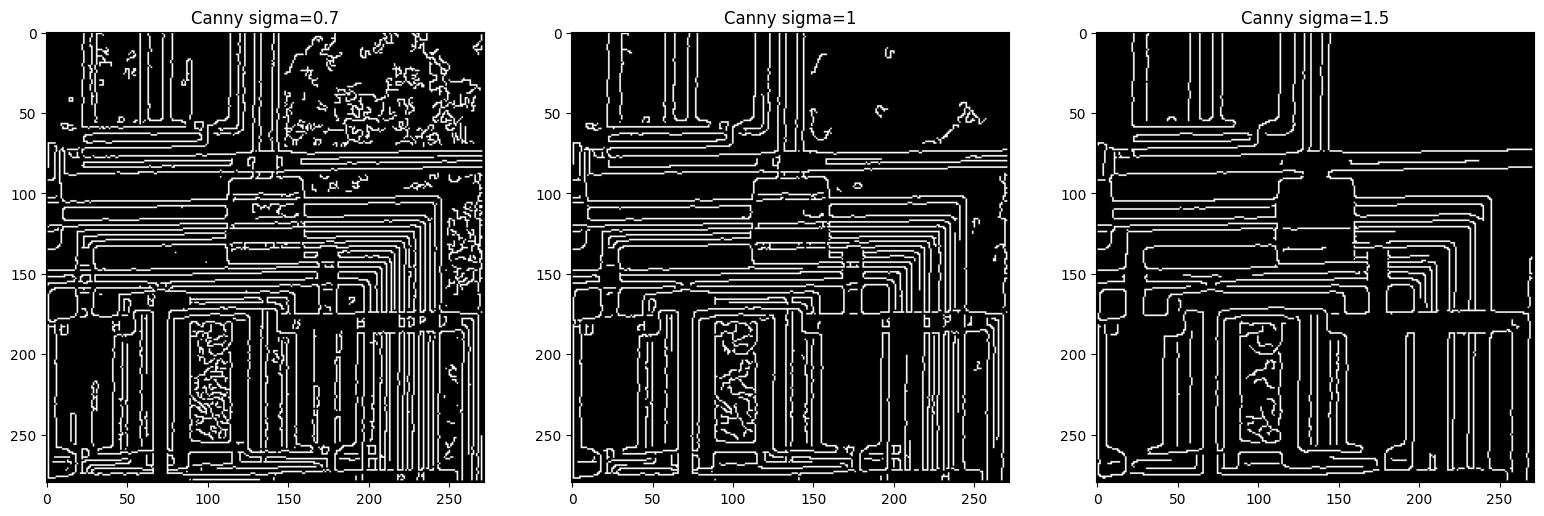

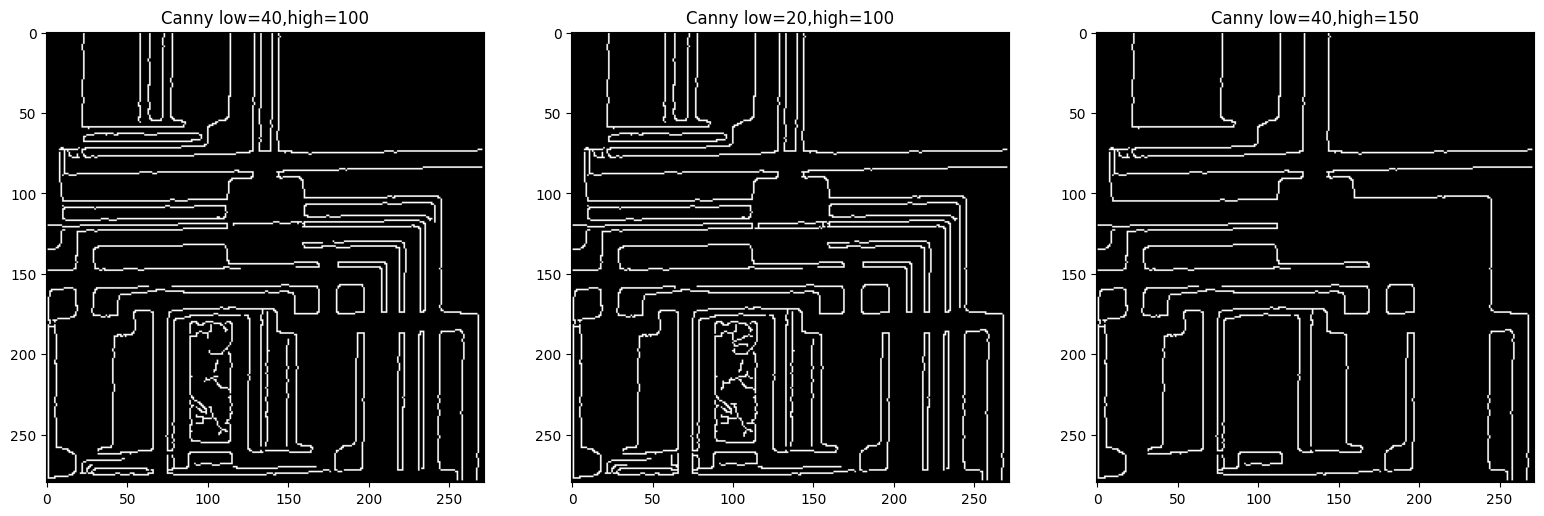

In [9]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
img = io.imread('circuit.tif', as_gray=True)


prewittImg = prewitt(img)

robertsImg = roberts(img)

sobelImg = sobel(img)
sobelvImg = sobel_v(img)
sobelhImg = sobel_h(img)

cannyImg1 = canny(img, sigma=0.7)
cannyImg2 = canny(img, sigma=1)
cannyImg3 = canny(img, sigma=1.5)

cannyThres1 = canny(img, sigma=1, low_threshold=40, high_threshold=100)
cannyThres2 = canny(img, sigma=1, low_threshold=20, high_threshold=100)
cannyThres3 = canny(img, sigma=1, low_threshold=40, high_threshold=150)


show_images([img], ["Original Image"])
show_images([robertsImg, prewittImg], ["Roberts ED", "Prewitt ED"])
show_images([sobelvImg, sobelhImg, sobelImg], ["Sobel vertical edges", "Sobel horizontal edges", "Sobel"])

show_images([cannyImg1, cannyImg2, cannyImg3], ["Canny sigma=0.7", "Canny sigma=1", "Canny sigma=1.5"])
show_images([cannyThres1, cannyThres2, cannyThres3], ["Canny low=40,high=100", "Canny low=20,high=100", "Canny low=40,high=150"])


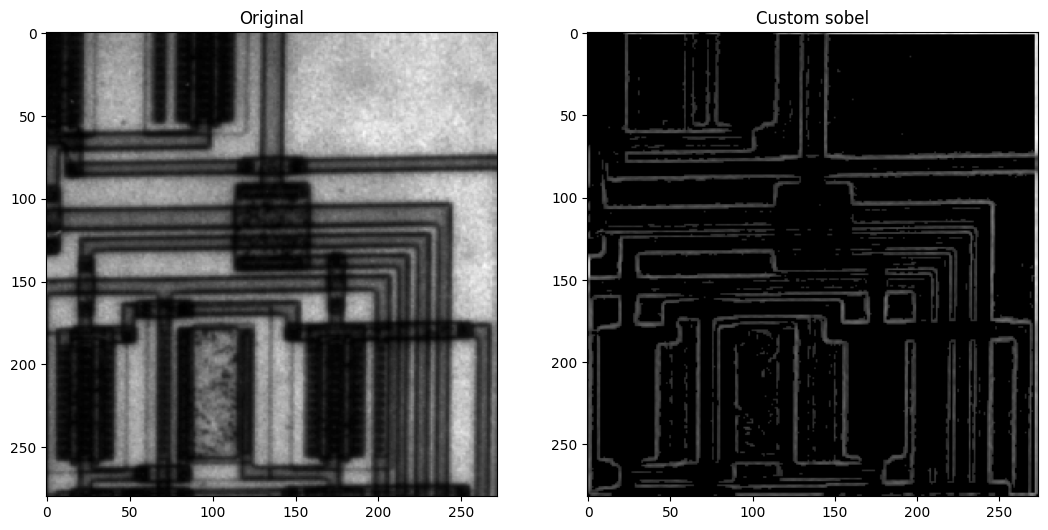

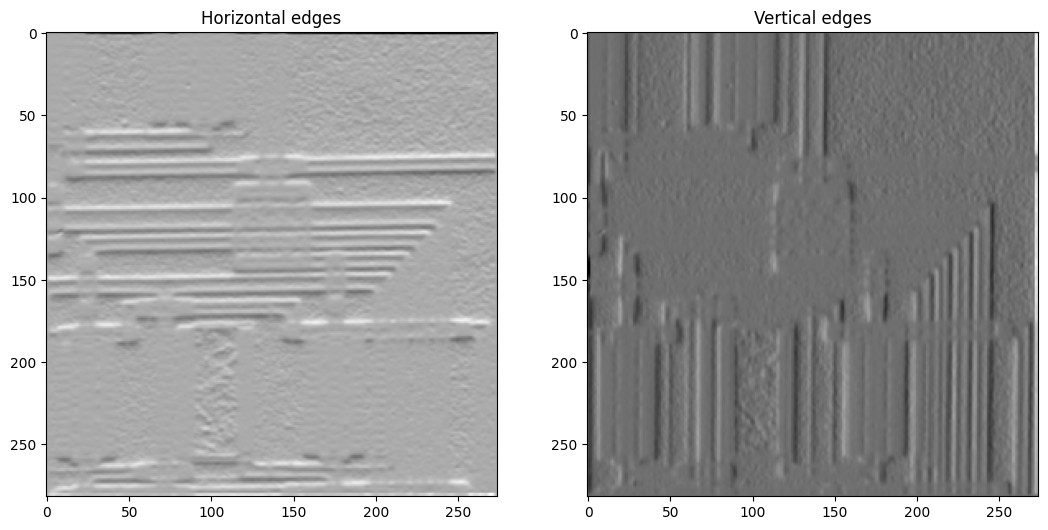

In [10]:
# 2. Custom Sobel (V-H-Both)

def customSobel(img, threshold=None):
	#create the filters
	hy = np.array([
			[-1,0,1],
			[-2,0,2],
			[-1,0,1]
	])

	hx = np.array([
			[-1,-2,-1],
			[0, 0, 0],
			[1, 2, 1]
	]) 

	x_image = convolve2d(img, hx)
	y_image = convolve2d(img, hy)
	xy_image = np.sqrt(x_image**2 + y_image**2)

	if (threshold != None):
		xy_image[xy_image < threshold] = 0

	return x_image, y_image, xy_image


imgX, imgY, filteredImage = customSobel(img, 110)

show_images([img, filteredImage], ["Original", "Custom sobel"])
show_images([imgX, imgY], ["Horizontal edges", "Vertical edges"])

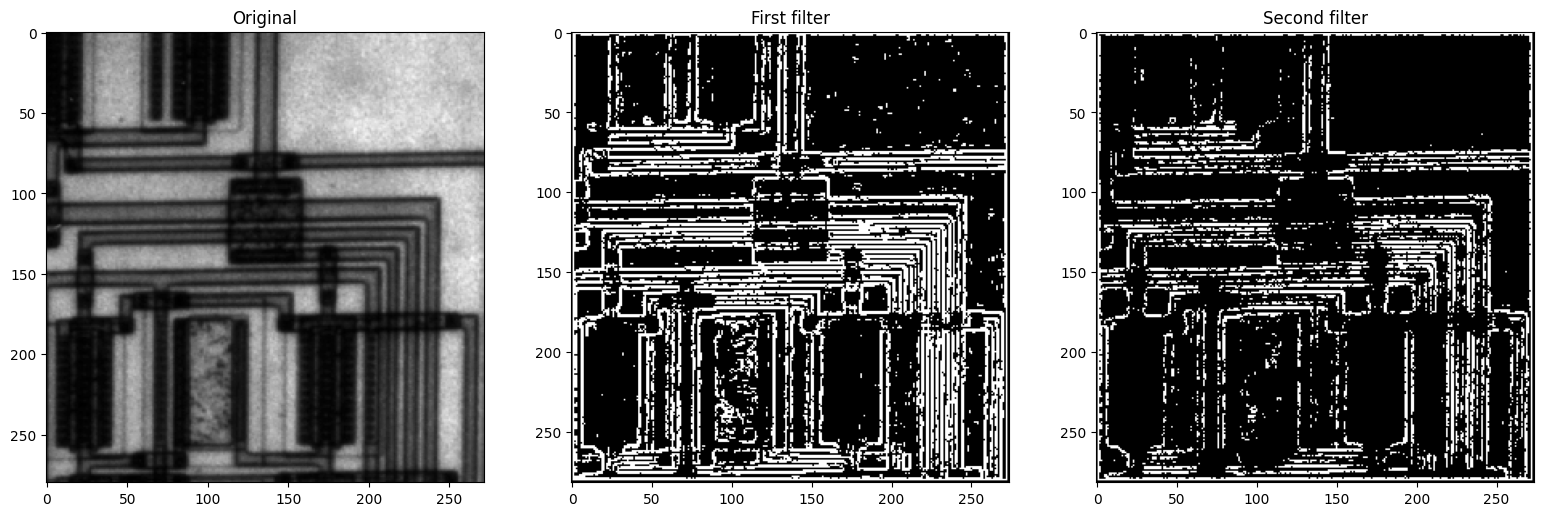

In [11]:
# 3. Custom LoG

def LOG(img, sigma, thres, filter=1):
	gaus_img = img_as_ubyte(gaussian(img, sigma=sigma,))

	f1 = np.array([ [-1,-1,-1],
									[-1,8,-1 ],
									[-1,-1,-1]])

	f2 = np.array([ [0,1,0],
									[1,-4,1],
									[0,1,0]])

	img_Log = convolve2d(gaus_img, f1 if filter==1 else f2)

	def ZeroCrossCalc(img):
		output = np.zeros(img.shape)
		w = output.shape[1]
		h = output.shape[0]
		for y in range(1, h - 1):
				for x in range(1, w - 1):
						patch = img[y-1:y+2, x-1:x+2]
						p = img[y, x]
						maxP = patch.max()
						minP = patch.min()
						zeroCross = False
						if ((p > 0 and minP < 0)  or (p < 0 and maxP > 0)):
								zeroCross = True
						if ((maxP - minP) > thres) and zeroCross:
								output[y, x] = 1
		return output
	
	return ZeroCrossCalc(img_Log)

img = (io.imread('circuit.tif')) 
filter1 = LOG(img, sigma=1.4, thres=20)
filter2 = LOG(img, sigma=1.4, thres=10, filter=2)

show_images([img, filter1, filter2],["Original", "First filter", "Second filter"])



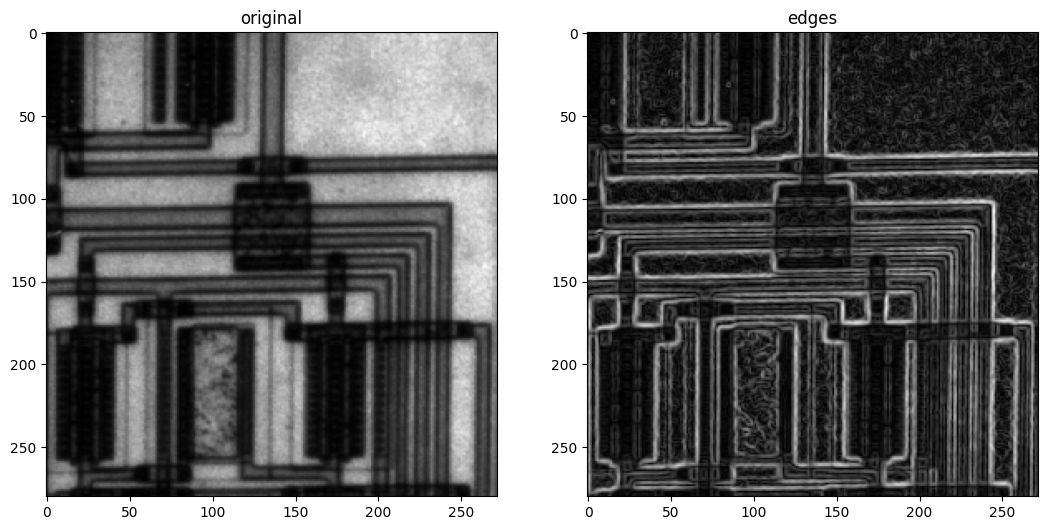

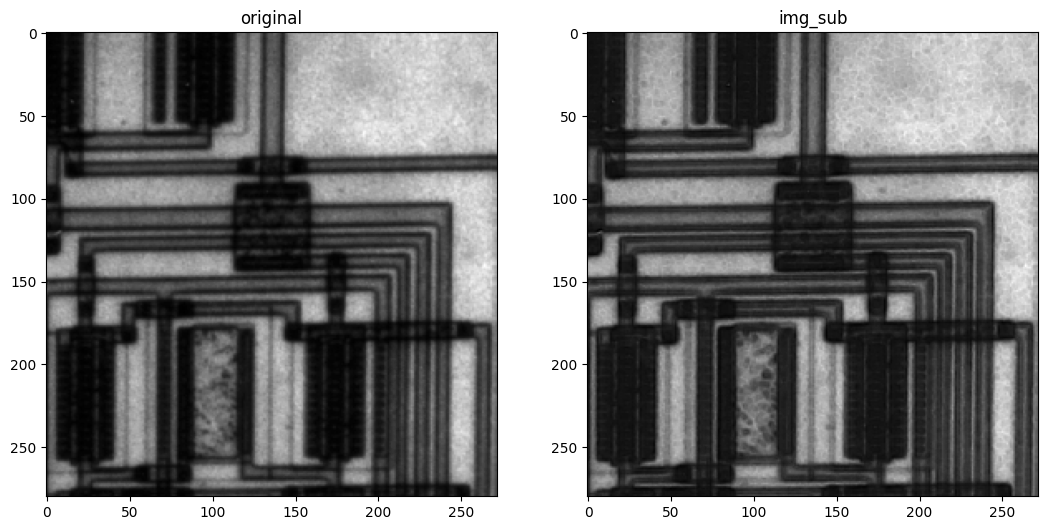

In [13]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
img = io.imread('circuit.tif')
img_edges = sobel(img)
show_images([img,img_edges],['original','edges'])
img_edges = img_edges * 0.9
img_sub = img - (img_edges*255).astype(np.uint8)

show_images([img,img_sub],['original','img_sub'])

	# # print(img_f1)
	# # tresholding
	# # show_images([img_f1,img_f2],['f1','f2'])
	# def get_laplacian(img):
	#     # convert to a  sign array
	#     # lap = np.sign(img) 
	#     lap =img.copy() # np.sign(img) 
	#     # print(lap)
	#     # pad with zeros
	#     lap = np.pad(lap, ((0, 1), (0, 1)))
	#     diff_x = lap[:-1, :-1] - lap[:-1, 1:] > thres 
	#     diff_y = lap[:-1, :-1] - lap[1:, :-1] > thres
	
	#     edges =  np.logical_or(diff_x, diff_y).astype(float)
	#     # edges = np.sqrt(diff_x**2 + diff_y**2)
	#     return edges

